### Edge flow denoising


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:

import numpy as np
from sclibrary import read_csv, get_coordinates
from sclibrary import SCPlot


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, 
             delimeter=delimeter, 
             src_col=src_col, 
             dest_col=dest_col, 
             feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")

# create a plot
scplot = SCPlot(sc, coordinates)

In [3]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

Error 0.7023925539678443


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


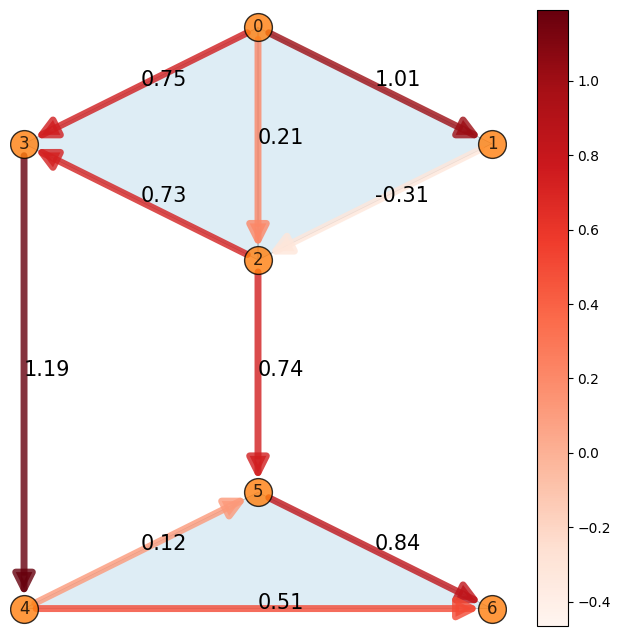

In [4]:
from sclibrary.filters import EdgeFlowDenoising

# denoising with lowe pass filter
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(p_choice="L1", component="gradient", f=f)

f_est_L1 = efd.history["f_estimated"]
print("Error", efd.calculate_error(f_est_L1, f0))

scplot.draw_network(edge_flow=np.round(f_est_L1, 2))

Error 0.7309451950015002


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


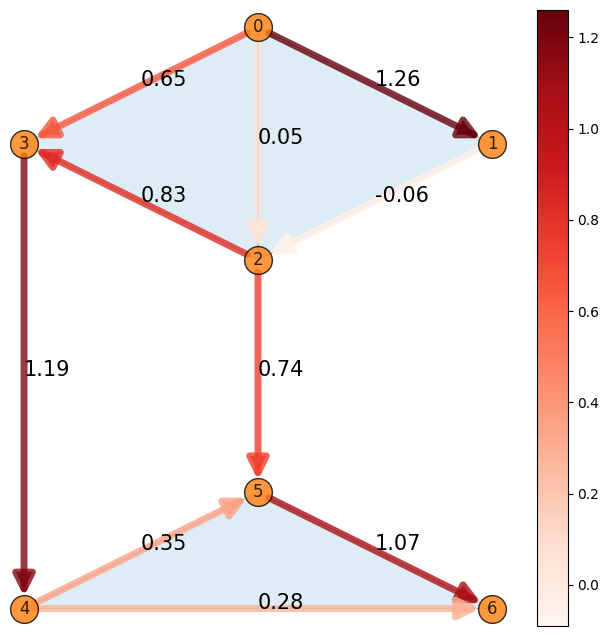

In [5]:
efd.denoise(p_choice="L1L", component="gradient", f=f)

f_est_L1L = efd.history["f_estimated"]
print("Error", efd.calculate_error(f_est_L1L, f0))

scplot.draw_network(edge_flow=np.round(f_est_L1L, 2))

Error 0.40961589921445996


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


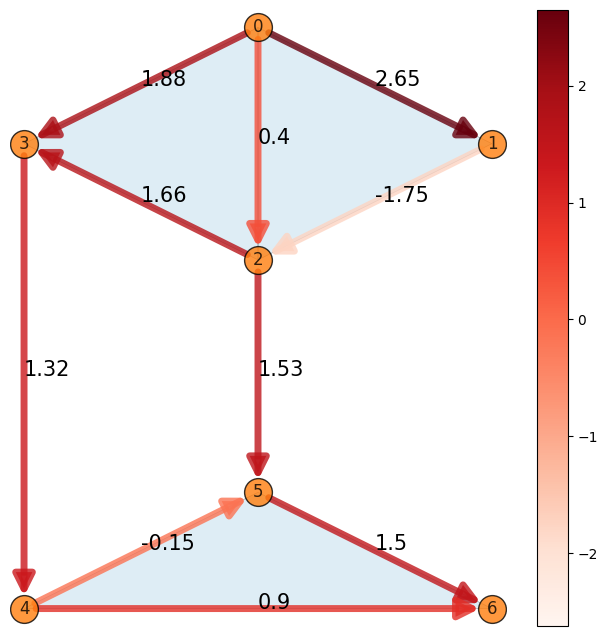

In [6]:
efd.denoise(p_choice="L1U", component="gradient", f=f)

f_est_L1U = efd.history["f_estimated"]
print("Error", efd.calculate_error(f_est_L1U, f0))

scplot.draw_network(edge_flow=np.round(f_est_L1U, 2))

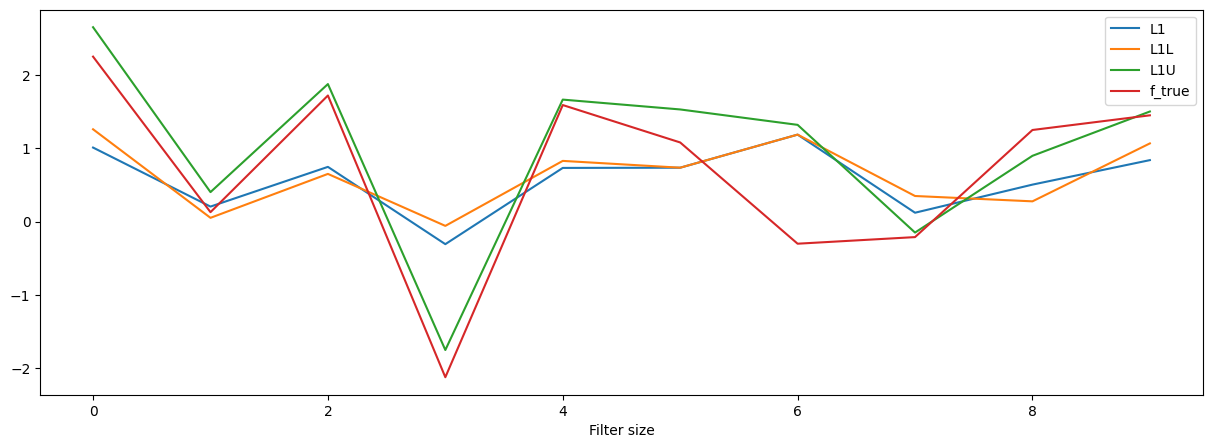

In [7]:
# plot frequency response

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(range(len(f_est_L1)), f_est_L1, label="L1")
plt.plot(range(len(f_est_L1)), f_est_L1L, label="L1L")
plt.plot(range(len(f_est_L1)), f_est_L1U, label="L1U")
plt.plot(range(len(f_est_L1)), f0, label="f_true")
plt.xlabel("Filter size")
plt.legend()
plt.show()